In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Movie_regression.csv' , header=0 )
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [4]:
df.isna().sum()

Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                  0
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     0
Director_rating         0
Producer_rating         0
Critic_rating           0
Trailer_views           0
3D_available            0
Time_taken             12
Twitter_hastags         0
Genre                   0
Avg_age_actors          0
Num_multiplex           0
Collection              0
dtype: int64

In [5]:
df['Time_taken'].mean()

157.3914979757085

In [6]:
# df['Time_taken'].fillna(df['Time_taken'].mean() , inplace=True) # for permanent change

In [7]:
df['Time_taken'] = df['Time_taken'].fillna(df['Time_taken'].mean() , axis=0)

In [8]:
df.isna().sum()

Marketing expense      0
Production expense     0
Multiplex coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
3D_available           0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
Num_multiplex          0
Collection             0
dtype: int64

In [9]:
df = pd.get_dummies(df,columns=['3D_available','Genre'] , drop_first=True) # drop_first convert column to get output as n-1 

In [10]:
df.head()


,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


In [11]:
X = df.drop('Collection',axis=1)
y=df['Collection']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 , test_size=0.2)

### training_regression tree

In [14]:
from sklearn.tree import  DecisionTreeRegressor

In [15]:
help(DecisionTreeRegressor())

Help on DecisionTreeRegressor in module sklearn.tree._classes object:

class DecisionTreeRegressor(sklearn.base.RegressorMixin, BaseDecisionTree)
 |  DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)
 |  
 |  A decision tree regressor.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
 |      The function to measure the quality of a split. Supported criteria
 |      are "squared_error" for the mean squared error, which is equal to
 |      variance reduction as feature selection criterion and minimizes the L2
 |      loss using the mean of each terminal node, "friedman_mse", which uses
 |      mean squared error with Friedman's impro

In [16]:
regtree = DecisionTreeRegressor(max_depth=3)

In [17]:
regtree.fit(X_train , y_train)

DecisionTreeRegressor(max_depth=3)

In [18]:
y_train_pred = regtree.predict(X_train)
y_test_pred = regtree.predict(X_test)

In [19]:
from sklearn.metrics import r2_score , accuracy_score , mean_squared_error

In [20]:
mean_squared_error(y_test , y_test_pred)

53186393.30490645

In [21]:
r2_score(y_test , y_test_pred)

0.8196931100678884

In [22]:
r2_score(y_train , y_train_pred)

0.8307257923660495

### plot decision tree

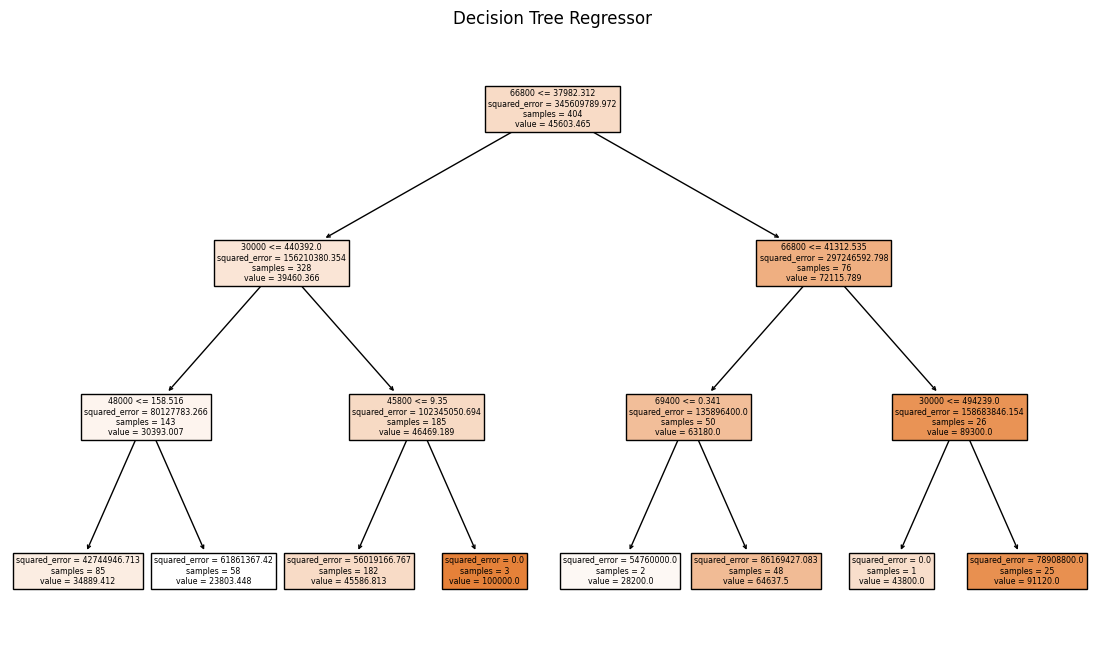

In [23]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14, 8))
plot_tree(regtree, filled=True, feature_names=y)
plt.title("Decision Tree Regressor")
plt.show()


## Controlling Tree Growth

#### Maximum number of level of tree

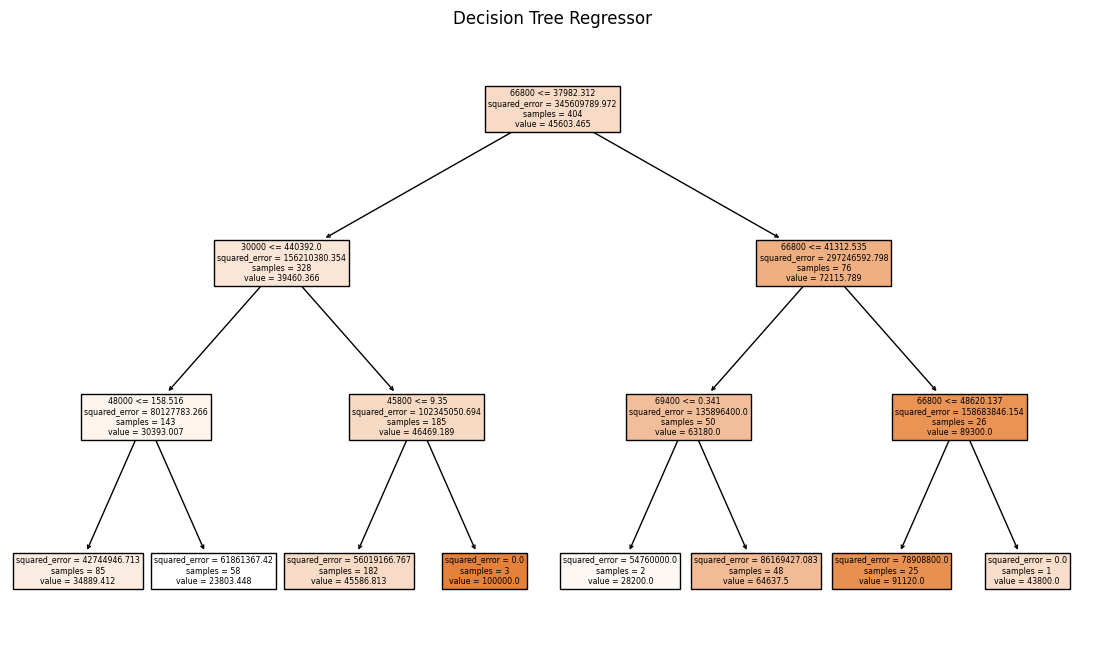

In [24]:
regtree1 = DecisionTreeRegressor(max_depth= 3 )
regtree1.fit(X_train,y_train)

plt.figure(figsize=(14, 8))
plot_tree(regtree1, filled=True, feature_names=y)
plt.title("Decision Tree Regressor")
plt.show()


#### Minimum observation at internal node

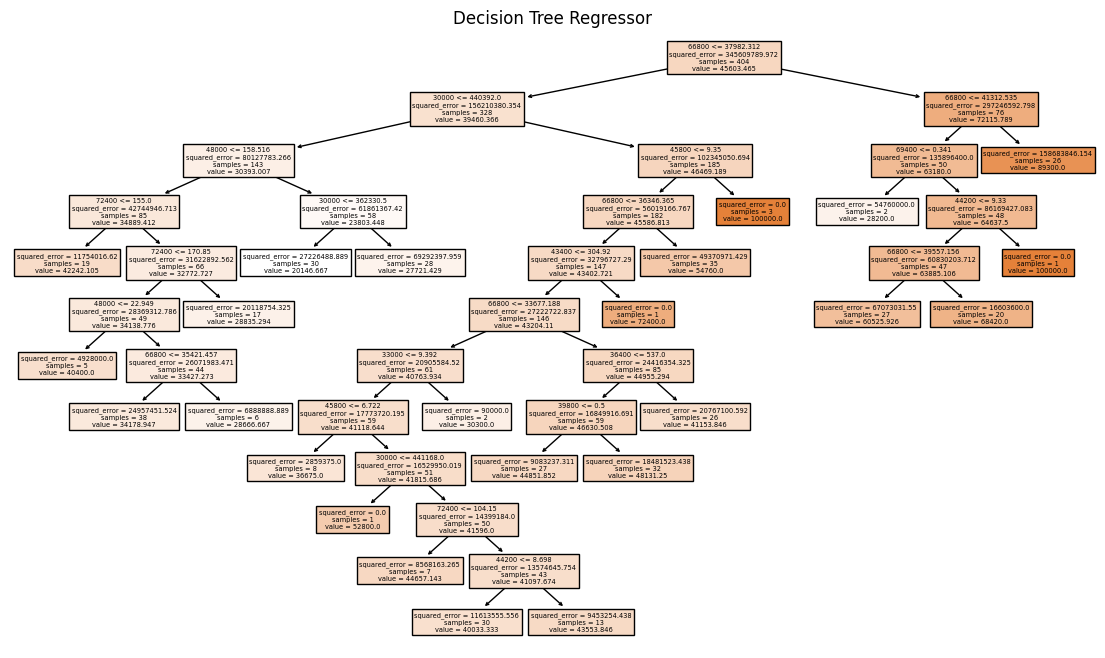

In [25]:
regtree2 = DecisionTreeRegressor(min_samples_split = 40 )
regtree2.fit(X_train,y_train)

plt.figure(figsize=(14, 8))
plot_tree(regtree2, filled=True, feature_names=y)
plt.title("Decision Tree Regressor")
plt.show()

#### Minimum observation at leaf  node

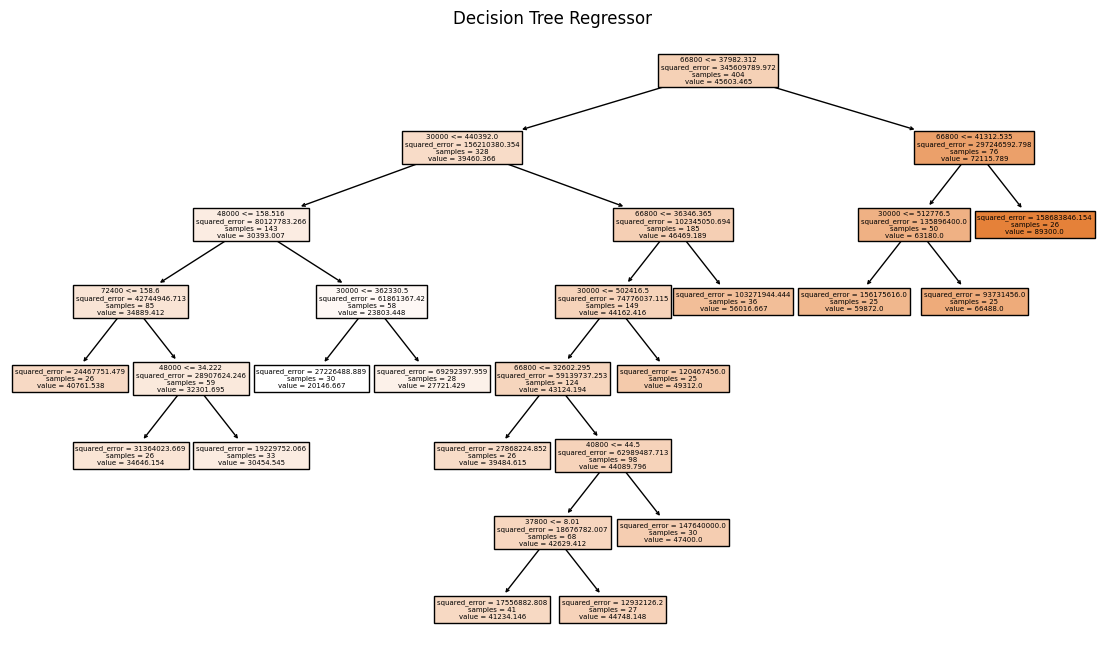

In [26]:
regtree3 = DecisionTreeRegressor(min_samples_leaf= 25)
regtree3.fit(X_train , y_train)
plt.figure(figsize=(14, 8))
plot_tree(regtree3, filled=True, feature_names=y)
plt.title("Decision Tree Regressor")
plt.show()